In [205]:
import pandas as pd 
import numpy as np
import networkx as nx
import pickle
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.spatial.distance as spsd
import scipy.linalg as spla
import sys
import random
import math
import itertools
from sklearn import linear_model

In [217]:
data=pd.read_csv("./Data/BodyFat.csv")

## Preview


In [366]:
data.info()#there is no missing data (252 non-null)
data.describe().drop("count",axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDNO       252 non-null    int64  
 1   BODYFAT    252 non-null    float64
 2   DENSITY    252 non-null    float64
 3   AGE        252 non-null    int64  
 4   WEIGHT     252 non-null    float64
 5   HEIGHT     252 non-null    float64
 6   ADIPOSITY  252 non-null    float64
 7   NECK       252 non-null    float64
 8   CHEST      252 non-null    float64
 9   ABDOMEN    252 non-null    float64
 10  HIP        252 non-null    float64
 11  THIGH      252 non-null    float64
 12  KNEE       252 non-null    float64
 13  ANKLE      252 non-null    float64
 14  BICEPS     252 non-null    float64
 15  FOREARM    252 non-null    float64
 16  WRIST      252 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 33.6 KB


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
mean,126.500000,18.938492,1.055574,44.884921,178.924405,70.148810,25.436905,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,72.890329,7.750856,0.019031,12.602040,29.389160,3.662856,3.648111,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,1.000000,0.000000,0.995000,22.000000,118.500000,29.500000,18.100000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,63.750000,12.800000,1.041400,35.750000,159.000000,68.250000,23.100000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,126.500000,19.000000,1.054900,43.000000,176.500000,70.000000,25.050000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,189.250000,24.600000,1.070400,54.000000,197.000000,72.250000,27.325000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,252.000000,45.100000,1.108900,81.000000,363.150000,77.750000,48.900000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


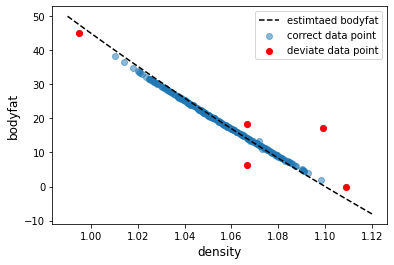

In [370]:

out=data.loc[abs((495/data['DENSITY']-450)-data['BODYFAT'])>2,]
x=np.linspace(0.99,1.12,num=1000)
plt.plot(x,(495/x)-450,color='black',ls='--',label='estimtaed bodyfat')

plt.scatter(data["DENSITY"],data["BODYFAT"],alpha=0.5,label='correct data point')
plt.scatter(out["DENSITY"], out["BODYFAT"], color="red",label='deviate data point')
plt.xlabel("density",fontsize=12)
plt.ylabel("bodyfat",fontsize=12)
plt.legend()

In [394]:
esti=pd.DataFrame()
esti['IDNO']=out['IDNO']
esti['DENSITY']=out['DENSITY']
esti['BODYFAT']=out['BODYFAT']
esti['ESTIMATED_BODYFAT']=out['ESTIMATED_BF']
esti

,IDNO,DENSITY,BODYFAT,ESTIMATED_BODYFAT
47,48,1.0665,6.4,14.135021
75,76,1.0666,18.3,14.091506
95,96,1.0991,17.3,0.368483
181,182,1.1089,0.0,-3.611687
215,216,0.9950,45.1,47.487437


{'whiskers': [<matplotlib.lines.Line2D at 0x7fab835a4f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab835b1640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab835a4be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab835b1d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab842b5040>],
 'means': []}

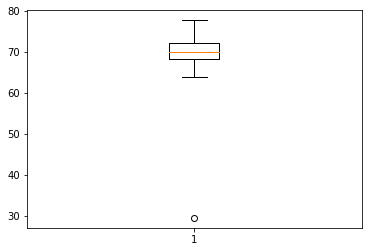

In [409]:
plt.boxplot(data['HEIGHT'])

## 1. ID=182 : Body fat = 0

In [282]:
data.loc[data['BODYFAT']==0.0]


,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
181,182,0.0,1.1089,40,118.5,68.0,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In [283]:
data.loc[data['BODYFAT']==0.0,'BODYFAT']=7.3
data.loc[data["IDNO"]==182]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
181,182,7.3,1.1089,40,118.5,68.0,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


## 2. ID=42 : Height Typo

In [284]:
data.loc[data['HEIGHT']==29.5]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
41,42,31.7,1.025,44,205.0,29.5,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


### We use BMI to impute this value
### BMI(kg/m^2) = Body Mass(kg) / (Body Height(m))^2

In [285]:
### 1 pound = 0.453592 kg
### 1 m = 39.3701 inches
data.loc[data['HEIGHT']==29.5]['WEIGHT']*0.453592/(data.loc[data['HEIGHT']==29.5]['ADIPOSITY'])

41    3.109912
dtype: float64

In [286]:
math.sqrt(3.109912)*39.3701

69.42894530922234

In [288]:
data.loc[data['HEIGHT']==29.5,"HEIGHT"]=69.5

# Change pound to kg, inch to meter

In [295]:
data['WEIGHT_KG']=data['WEIGHT']*0.453
data['HEIGHT_M']=data['HEIGHT']* 0.0254

In [225]:
data.to_csv("Data/adjust_bodyfat.csv")